Taxonomy files in /home/nyuad/Capstone/Scikit/Taxonomy:
Mutual Information | 99 Features Taxonomy.txt
ANOVA F-value | 79 Features Taxonomy.txt
ANOVA F-value | 27 Features Taxonomy.txt
Mutual Information | 24 Features Taxonomy.txt
ANOVA F-value | 25 Features Taxonomy.txt
Mutual Information | 50 Features Taxonomy.txt
Mutual Information | 21 Features Taxonomy.txt
ANOVA F-value | 112 Features Taxonomy.txt
Mutual Information | 19 Features Taxonomy.txt
ANOVA F-value | 73 Features Taxonomy.txt
Mutual Information | 28 Features Taxonomy.txt
ANOVA F-value | 119 Features Taxonomy.txt
Mutual Information | 22 Features Taxonomy.txt
ANOVA F-value | 52 Features Taxonomy.txt


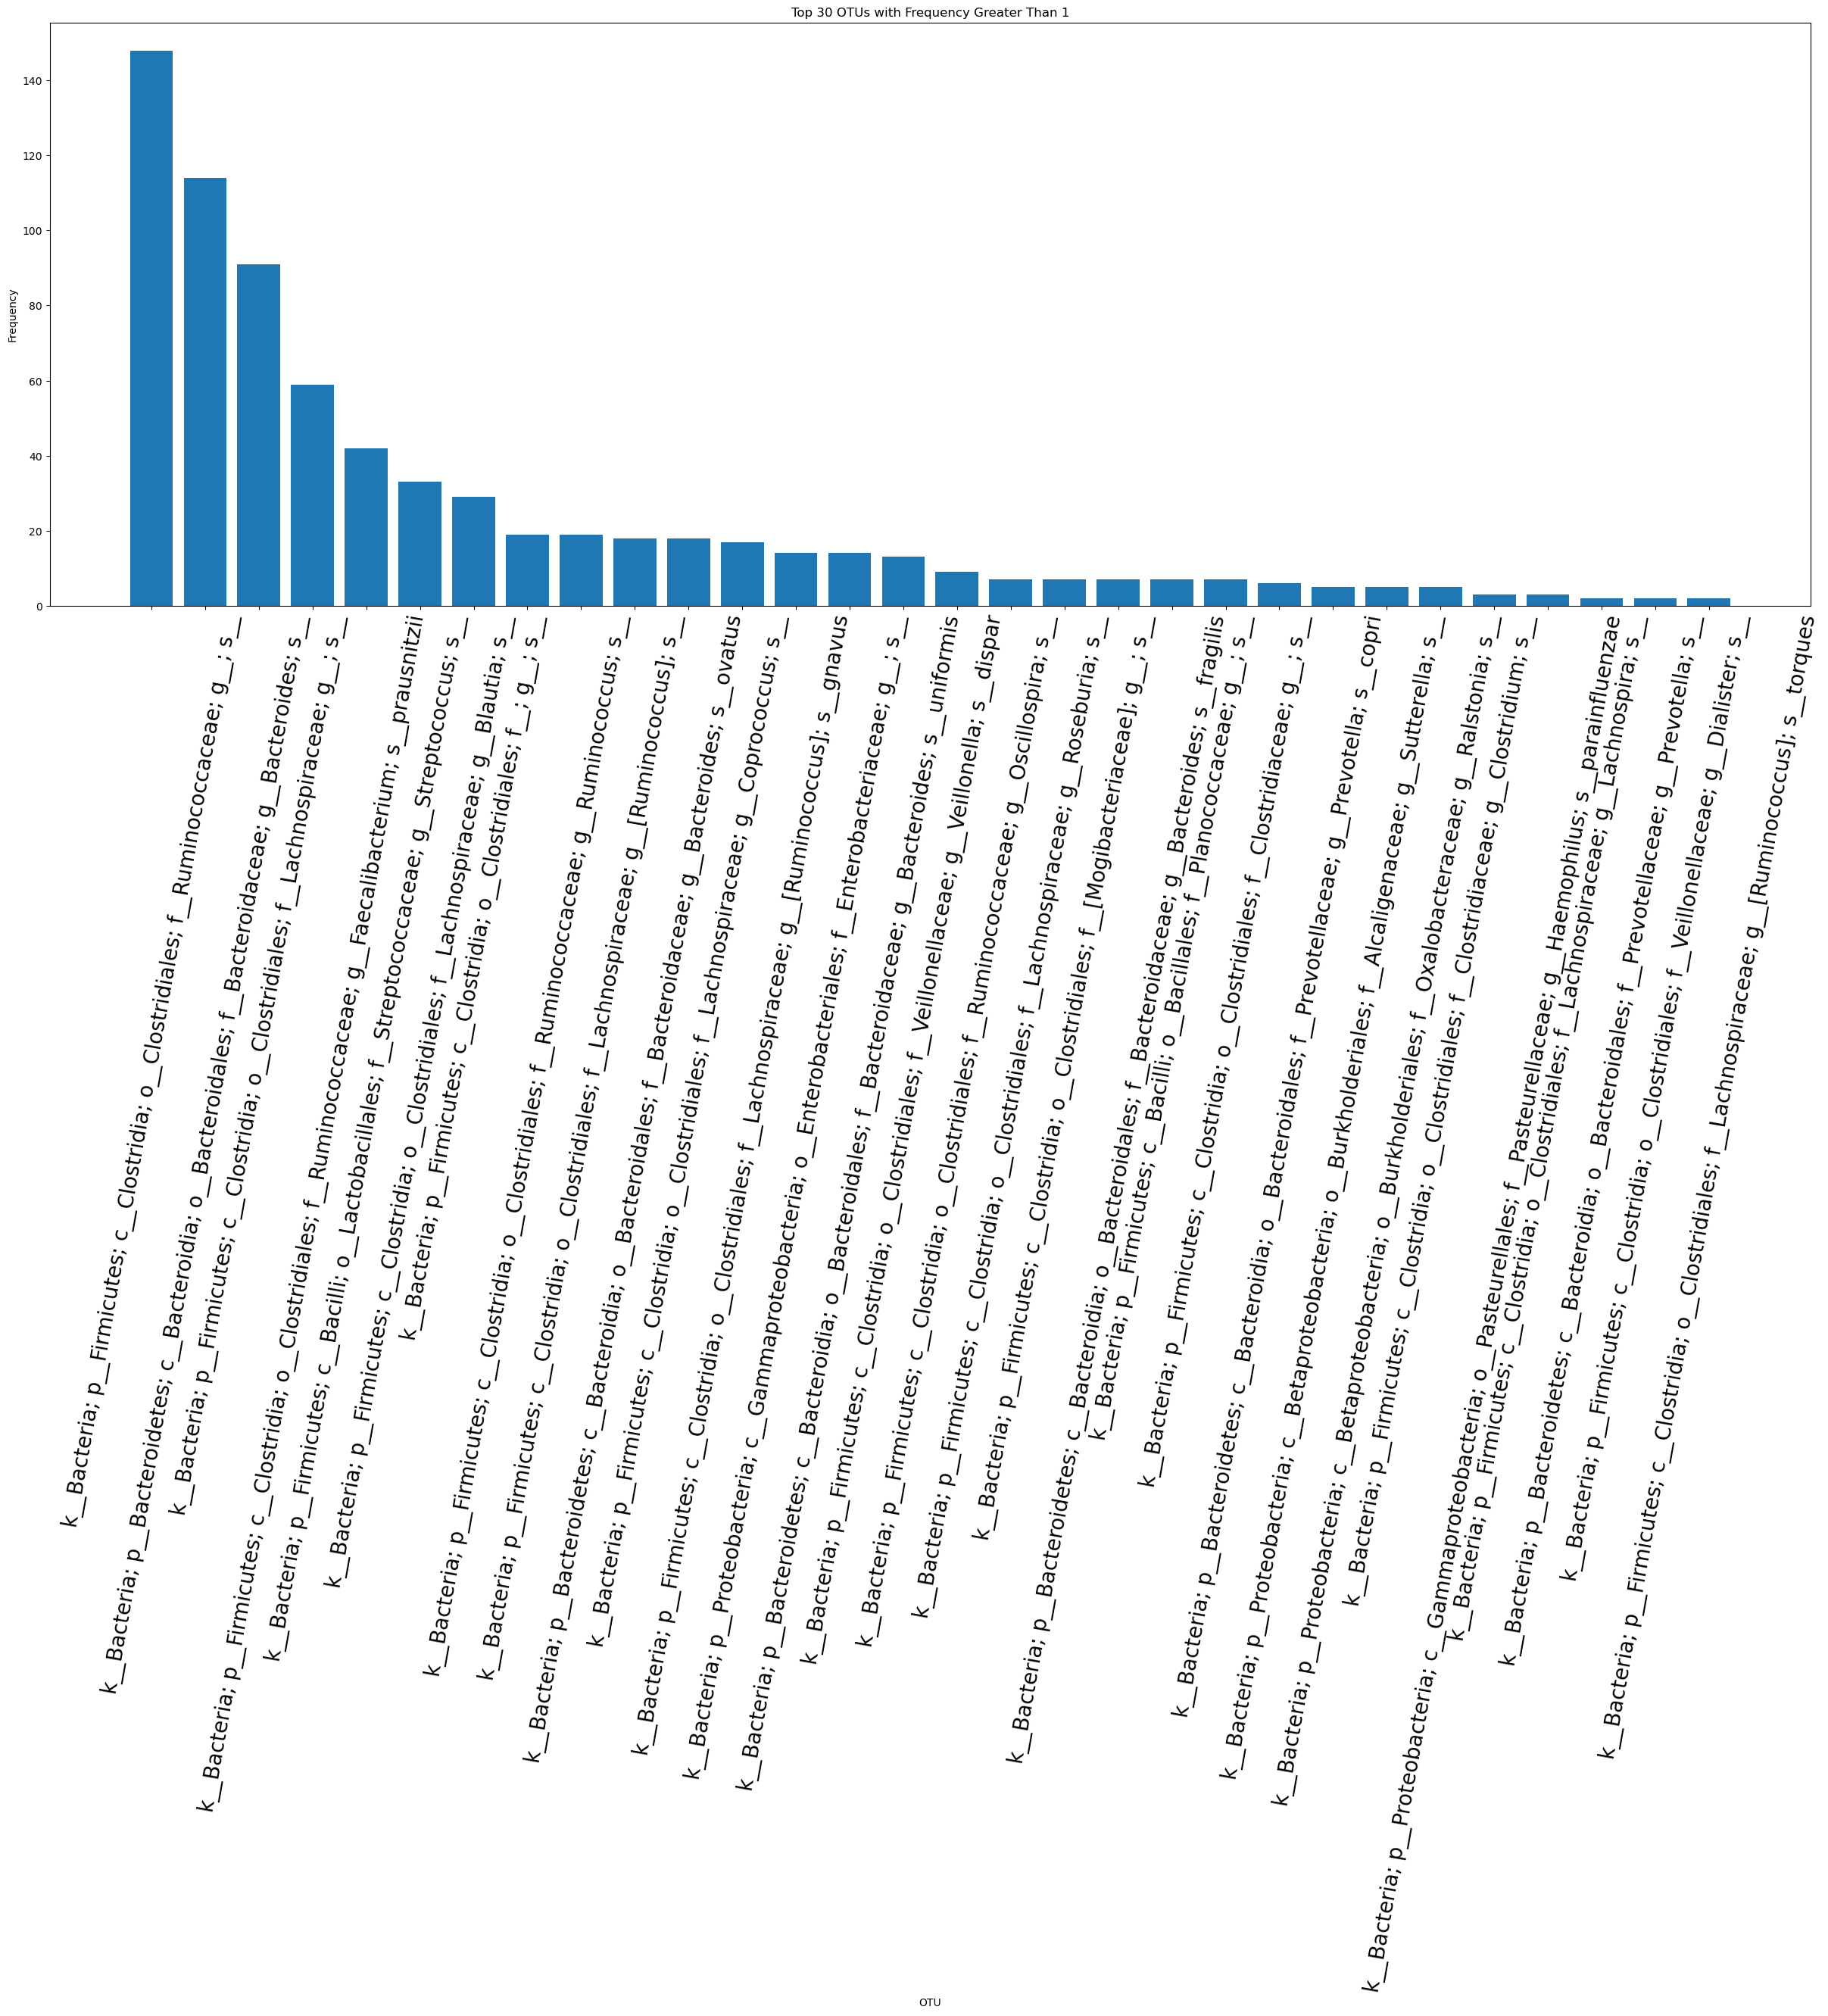

In [1]:
import os
import sys
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

def list_directory(path):
    """ Lists all files ending with 'Taxonomy.txt' in the given path """
    try:
        entries = os.listdir(path)
        taxonomy_files = [entry for entry in entries if entry.endswith('Taxonomy.txt')]
        print(f"Taxonomy files in {path}:")
        for file in taxonomy_files:
            print(file)
        return taxonomy_files
    except FileNotFoundError:
        print(f"The directory {path} was not found.")
        return []
    except PermissionError:
        print(f"Permission denied for accessing {path}.")
        return []



def read_otu_file(filename):
    with open(filename, 'r') as file:
        otus = file.read().splitlines()
    return otus

def count_otus(otus, otu_counter):
    otu_counter.update(otus)
    return otu_counter

def print_otus_with_freq_greater_than_one(otu_counts):
    print("\nOTUs with Frequency Greater Than 1:")
    for otu, count in otu_counts.items():
        if count > 1:
            print(f"OTU: {otu}, Frequency: {count}")

def plot_otu_frequencies(otu_counts, top_n=30):
    # Filter OTUs with frequency greater than 1 and select top N OTUs
    filtered_otus = {otu: count for otu, count in otu_counts.items() if count > 1}
    top_otus = dict(sorted(filtered_otus.items(), key=lambda x: x[1], reverse=True)[:top_n])

    if not top_otus:
        print("No OTUs with frequency greater than 1 or not enough OTUs to display.")
        return

    otus, frequencies = zip(*top_otus.items())

    # Significantly increase the width of the figure to accommodate long OTU names
    plt.figure(figsize=(max(30, len(otus)), 10))  # The width is maximized to fit the OTU names

    plt.bar(otus, frequencies)  # Vertical bar chart
    plt.xlabel('OTU')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} OTUs with Frequency Greater Than 1')

    # Further angle the x-axis labels if necessary and adjust the font size
    plt.xticks(rotation=80, ha="center", fontsize=20)  # Rotate 90 degrees for more space

    # plt.tight_layout()  # Adjust layout to fit everything
    plt.show()




def main():
    directory_path = '/home/nyuad/Capstone/Scikit/Taxonomy'  # Replace with the directory you want to list
    file_list = list_directory(directory_path)

    cumulative_otu_counter = Counter()

    for otu_file in file_list:
        full_path = os.path.join(directory_path, otu_file)
        if os.path.isfile(full_path):
            otus = read_otu_file(full_path)
            cumulative_otu_counter = count_otus(otus, cumulative_otu_counter)

    # print_otus_with_freq_greater_than_one(cumulative_otu_counter)
    #print otus in descending order of frequency and write to csv
    sorted_otus = sorted(cumulative_otu_counter.items(), key=lambda x: x[1], reverse=True)
    #turn into dataframe
    df = pd.DataFrame(sorted_otus)
    #rename columns
    df.columns = ['OTU', 'Frequency']
    df.to_csv('sorted_otus.csv', index=False)
    
    plot_otu_frequencies(cumulative_otu_counter)

if __name__ == '__main__':
    main()


Differential Analysis in /home/nyuad/Capstone/Scikit/Taxonomy:
Differential Analysis | ANOVA F-value | 73 Features Selected OTUs.csv
Differential Analysis | ANOVA F-value | 52 Features Selected OTUs.csv
Differential Analysis | Mutual Information | 21 Features Selected OTUs.csv
Differential Analysis | ANOVA F-value | 79 Features Selected OTUs.csv
Differential Analysis | Mutual Information | 99 Features Selected OTUs.csv
Differential Analysis | Mutual Information | 24 Features Selected OTUs.csv
Differential Analysis | Mutual Information | 50 Features Selected OTUs.csv
Differential Analysis | ANOVA F-value | 25 Features Selected OTUs.csv
Differential Analysis | Mutual Information | 22 Features Selected OTUs.csv
Differential Analysis | ANOVA F-value | 27 Features Selected OTUs.csv
Differential Analysis | Mutual Information | 19 Features Selected OTUs.csv
Differential Analysis | ANOVA F-value | 119 Features Selected OTUs.csv
Differential Analysis | ANOVA F-value | 112 Features Selected OTUs

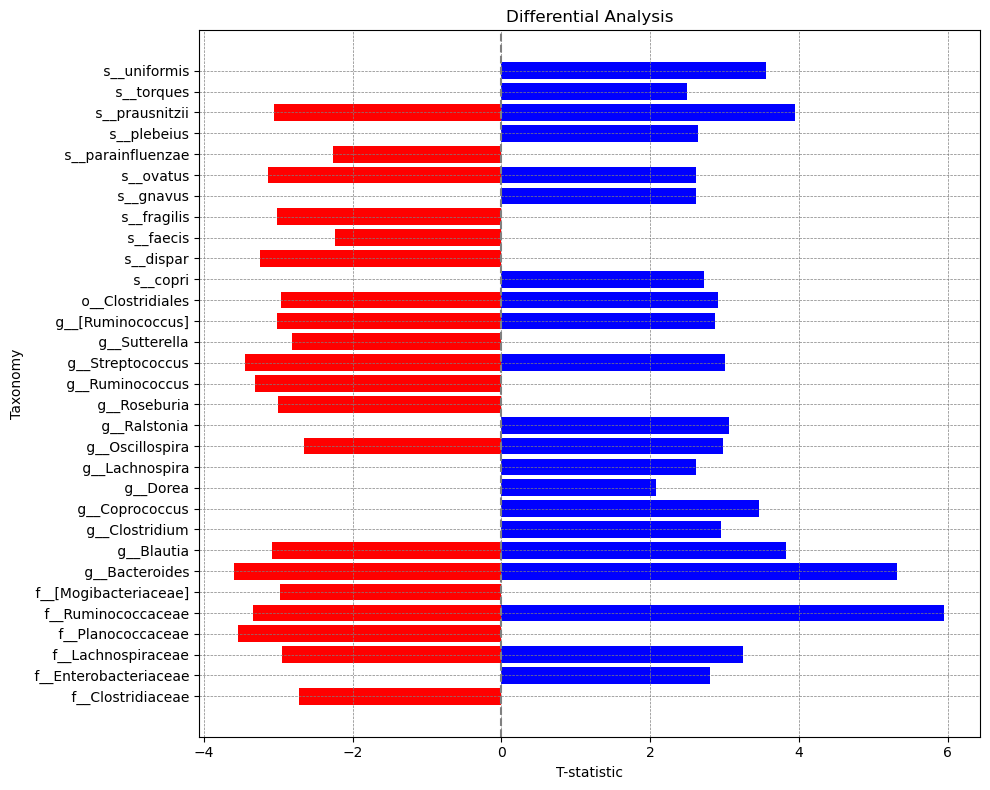

In [5]:
#Differential abundance analysis
# Path: Analysis.ipynb
import os
import sys
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

directory_path = '/home/nyuad/Capstone/Scikit/Taxonomy' 

def DA_directory(path):
    """ Lists all files ending with 'Taxonomy.txt' in the given path """
    try:
        entries = os.listdir(path)
        taxonomy_files = [entry for entry in entries if entry.startswith('Differential Analysis')]
        print(f"Differential Analysis in {path}:")
        for file in taxonomy_files:
            print(file)
        return taxonomy_files
    except FileNotFoundError:
        print(f"The directory {path} was not found.")
        return []
    except PermissionError:
        print(f"Permission denied for accessing {path}.")
        return []
    
file_list = DA_directory(directory_path)

#main df
DA = pd.DataFrame()
for otu_file in file_list:
    full_path = os.path.join(directory_path, otu_file)
    if os.path.isfile(full_path):
        df = pd.read_csv(full_path, sep=',')
        DA = pd.concat([DA, df], ignore_index=True)
        
#rename first column
DA = DA.rename(columns={DA.columns[0]: "OTU"})

DA['Taxonomy_Simplified'] = DA['Taxonomy'].apply(
    lambda taxonomy: next(
        (part for part in reversed(taxonomy.split(';')) if part.strip() and not part.endswith('__')), 
        None
    )
)



freq_df = pd.read_csv("sorted_otus.csv", sep=',')
#rename columns
freq_df.columns = ['Taxonomy', 'Frequency']
print(freq_df)
DA = DA.merge(freq_df, on='Taxonomy', how='left')

#sort based on frequency
DA = DA.sort_values(by=['Frequency'], ascending=False)

#group by taxonomy and


median_t_stat = DA['t_stat'].median()

DA['color'] = ['red' if x < 0 else 'blue' for x in DA['t_stat']]

# Sort the DataFrame by 'Taxonomy_Simplified' to have a consistent order for the plot
DA_sorted = DA.sort_values(by='Taxonomy_Simplified')

# Creating a two-sided bar graph
plt.figure(figsize=(10, 8))

# Plot each bar individually to use the colors assigned in the DataFrame
for i, row in DA_sorted.iterrows():
    plt.barh(row['Taxonomy_Simplified'], row['t_stat'], color=row['color'])

# Add the title and labels
plt.title('Differential Analysis')
plt.xlabel('T-statistic')
plt.ylabel('Taxonomy')

# Draw a vertical line at x=0 to separate negative and positive values
plt.axvline(x=0, color='gray', linestyle='--')

# Add a grid for better readability
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

# Ensure a tight layout to fit everything into the figure space
plt.tight_layout()

# Show the plot
plt.show()

    
    



Differential Analysis in /home/nyuad/Capstone/Scikit/Taxonomy:
Differential Analysis | ANOVA F-value | 73 Features Selected OTUs.csv
Differential Analysis | ANOVA F-value | 52 Features Selected OTUs.csv
Differential Analysis | Mutual Information | 21 Features Selected OTUs.csv
Differential Analysis | ANOVA F-value | 79 Features Selected OTUs.csv
Differential Analysis | Mutual Information | 99 Features Selected OTUs.csv
Differential Analysis | Mutual Information | 24 Features Selected OTUs.csv
Differential Analysis | Mutual Information | 50 Features Selected OTUs.csv
Differential Analysis | ANOVA F-value | 25 Features Selected OTUs.csv
Differential Analysis | Mutual Information | 22 Features Selected OTUs.csv
Differential Analysis | ANOVA F-value | 27 Features Selected OTUs.csv
Differential Analysis | Mutual Information | 19 Features Selected OTUs.csv
Differential Analysis | ANOVA F-value | 119 Features Selected OTUs.csv
Differential Analysis | ANOVA F-value | 112 Features Selected OTUs

<Figure size 1000x800 with 0 Axes>

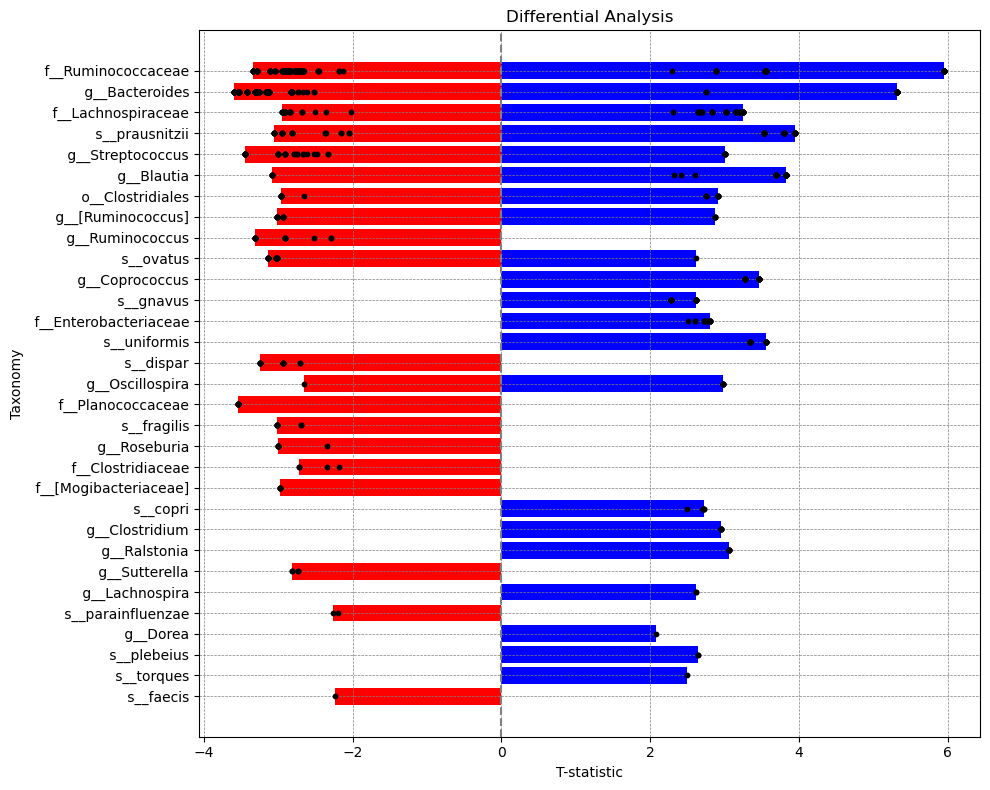

In [3]:
directory_path = '/home/nyuad/Capstone/Scikit/Taxonomy'  # Replace with the directory you want to list

file_list = DA_directory(directory_path)

#main df
DA = pd.DataFrame()
for otu_file in file_list:
    full_path = os.path.join(directory_path, otu_file)
    if os.path.isfile(full_path):
        df = pd.read_csv(full_path, sep=',')
        DA = pd.concat([DA, df], ignore_index=True)
        
print(DA)

DA['Taxonomy_Simplified'] = DA['Taxonomy'].apply(
    lambda taxonomy: next(
        (part for part in reversed(taxonomy.split(';')) if part.strip() and not part.endswith('__')), 
        None
    )
)



freq_df = pd.read_csv("sorted_otus.csv", sep=',')
#rename columns
freq_df.columns = ['Taxonomy', 'Frequency']
print(freq_df)
DA = DA.merge(freq_df, on='Taxonomy', how='left')
# Before plotting, sort the DataFrame based on the 't_stat' values
DA = DA.sort_values(by=['t_stat'], ascending=True)

# Calculate the median of the 't_stat' column
median_t_stat = DA['t_stat'].median()


# Creating a two-sided bar graph
plt.figure(figsize=(10, 8))

DA['color'] = ['red' if x < 0 else 'blue' for x in DA['t_stat']]

# Sort the DataFrame by 'Taxonomy_Simplified' to have a consistent order for the plot
DA_sorted = DA.sort_values(by='Frequency', ascending=True)

# Creating a two-sided bar graph
plt.figure(figsize=(10, 8))

# Plot each bar individually to use the colors assigned in the DataFrame
for i, row in DA_sorted.iterrows():
    plt.barh(row['Taxonomy_Simplified'], row['t_stat'], color=row['color'])

# Add the title and labels
plt.title('Differential Analysis')
plt.xlabel('T-statistic')
plt.ylabel('Taxonomy')

# Draw a vertical line at x=0 to separate negative and positive values
plt.axvline(x=0, color='gray', linestyle='--')

# Add a grid for better readability
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

# Ensure a tight layout to fit everything into the figure space
plt.tight_layout()

#plot median for each taxonomy
plt.scatter(DA['t_stat'], DA['Taxonomy_Simplified'], color='black', s=10, zorder=3, label='Points')

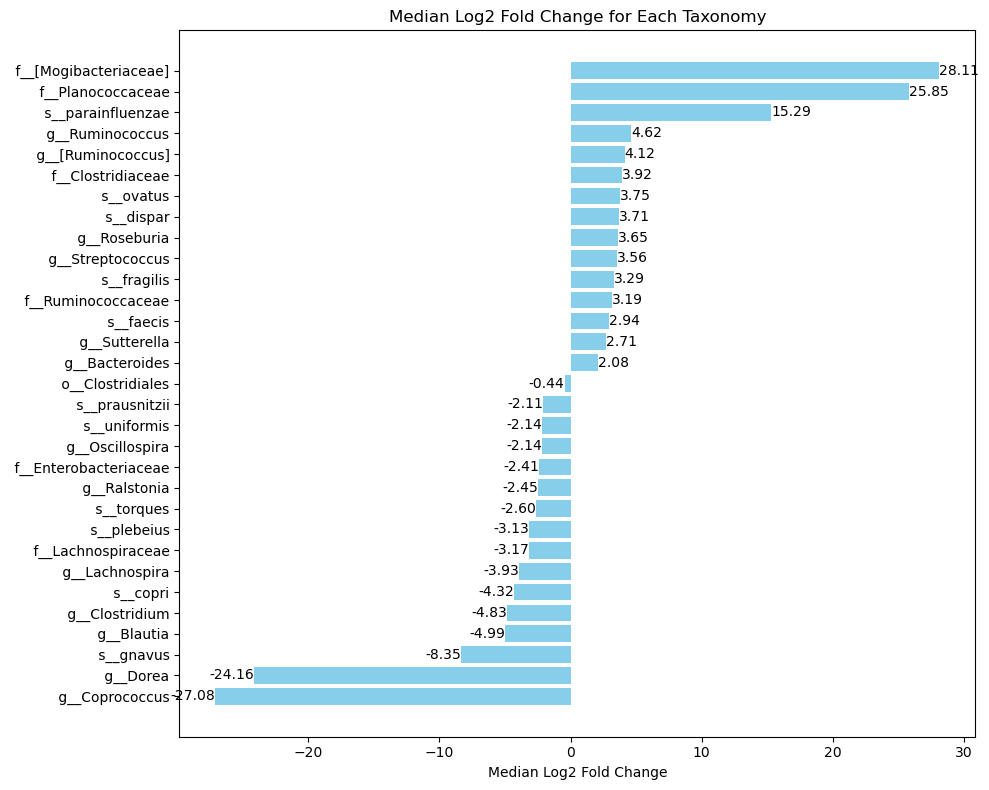

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming DA is your DataFrame and it's already loaded

# Group by 'Taxonomy_Simplified' and calculate the median 'log2_fold_change'
taxonomy_median = DA.groupby('Taxonomy_Simplified')['log2_fold_change'].median().reset_index()

# Sort the median values for better visualization
taxonomy_median_sorted = taxonomy_median.sort_values(by='log2_fold_change', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
bars = plt.barh(taxonomy_median_sorted['Taxonomy_Simplified'], taxonomy_median_sorted['log2_fold_change'], color='skyblue')

# Add the median values as text labels next to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}',
             va='center', ha='right' if bar.get_width() < 0 else 'left')

plt.xlabel('Median Log2 Fold Change')
plt.title('Median Log2 Fold Change for Each Taxonomy')
plt.tight_layout()
plt.show()
